In [40]:
import pandas as pd
df = pd.read_csv("credit_scoring_eng.csv")
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [42]:
# Convert negative values to positive
df['days_employed'] = df['days_employed'].abs()

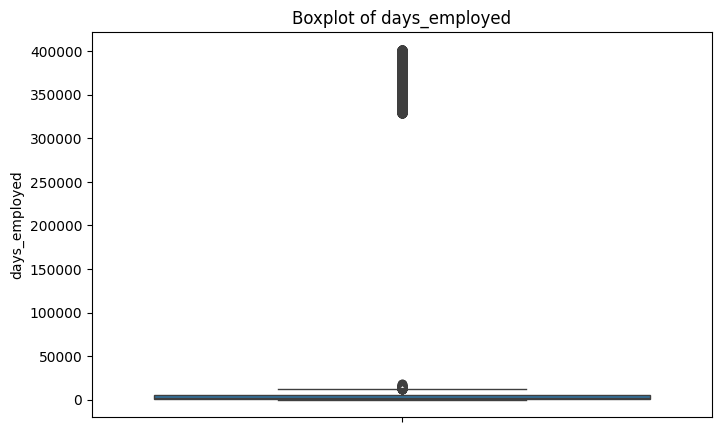

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['days_employed'])
plt.title("Boxplot of days_employed")
plt.show()


In [49]:
# Detecting outliers using IQR

Q1 = df['days_employed'].quantile(0.25)
Q3 = df['days_employed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['days_employed'] < lower_bound) | (df['days_employed'] > upper_bound)]
print(f"Number of outliers in days_employed: {len(outliers)}")


Number of outliers in days_employed: 0


In [51]:
import numpy as np

# Copy the original dataframe
df_capped = df.copy()

# Apply capping manually using np.where
df_capped['days_employed'] = np.where(
    df_capped['days_employed'] > upper_bound, upper_bound,
    np.where(df_capped['days_employed'] < lower_bound, lower_bound, df_capped['days_employed'])
)


In [52]:
# Check if any outliers remain
outliers_remaining = df_capped[
    (df_capped['days_employed'] < lower_bound) | (df_capped['days_employed'] > upper_bound)
]
print(f"Outliers remaining after capping: {outliers_remaining.shape[0]}")


Outliers remaining after capping: 0


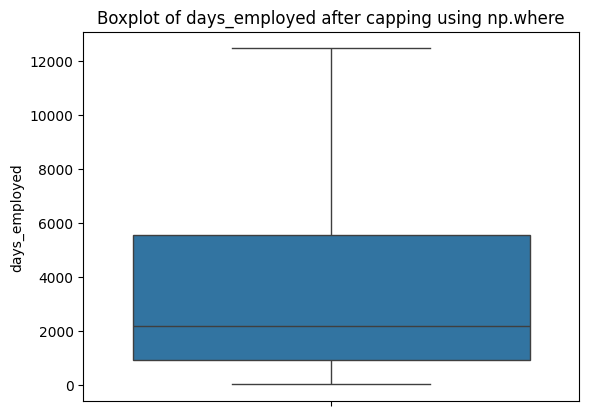

In [53]:
# Boxplot after capping
sns.boxplot(data=df_capped, y='days_employed')
plt.title("Boxplot of days_employed after capping using np.where")
plt.show()


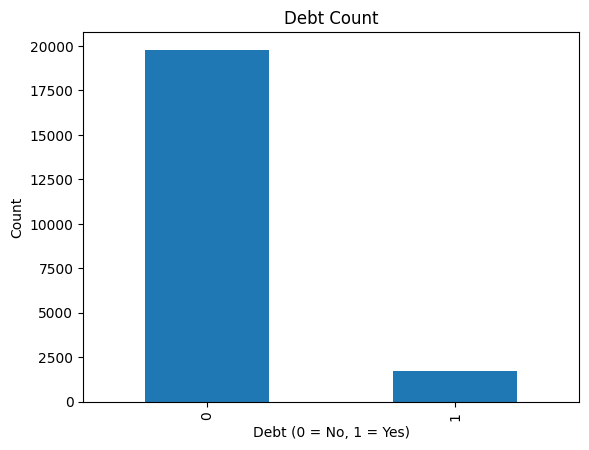

In [54]:
# Bar plot - count of people with and without debt
df['debt'].value_counts().plot(kind='bar', title='Debt Count')
plt.xlabel("Debt (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


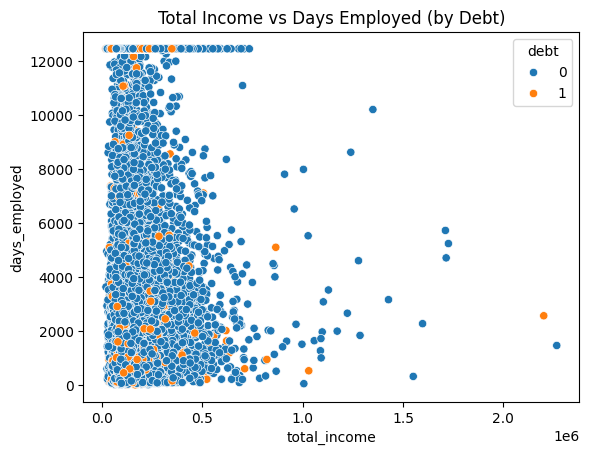

In [55]:
# Scatter plot for income vs days employed
sns.scatterplot(x='total_income', y='days_employed', hue='debt', data=df)
plt.title('Total Income vs Days Employed (by Debt)')
plt.show()
